In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data using pandas

In [264]:
df = pd.read_csv("lung_cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# Understant the Dataset Before Preprocessing starts.


In [265]:
# Find the name of each column memory usage and data types for each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [266]:
# Finding the Datatypes for each column seperatly
df.dtypes

,0
GENDER,object
AGE,int64
SMOKING,int64
YELLOW_FINGERS,int64
ANXIETY,int64
PEER_PRESSURE,int64
CHRONIC DISEASE,int64
FATIGUE,int64
ALLERGY,int64
WHEEZING,int64


### We can see that there are two categorical data and rest integer data. We can use this information for preprosessing like handling null values,categorical values,normalization etc.

In [267]:
# Finding the number of rows and columns
df.shape

(309, 16)

In [268]:
#Analyzing the interger or numerical columns with satistical summary
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


# Now we can begin with data pre processing part and preparing the data for model generation for better accuracy

In [269]:
#finding missing values
print(df.isna().count())

GENDER                   309
AGE                      309
SMOKING                  309
YELLOW_FINGERS           309
ANXIETY                  309
PEER_PRESSURE            309
CHRONIC DISEASE          309
FATIGUE                  309
ALLERGY                  309
WHEEZING                 309
ALCOHOL CONSUMING        309
COUGHING                 309
SHORTNESS OF BREATH      309
SWALLOWING DIFFICULTY    309
CHEST PAIN               309
LUNG_CANCER              309
dtype: int64


### All the columns are filled with 276 values and hence there is no null values in the dataset. If there is any null values we can filled them using avg. mean or by using Simple imputer etc.



In [270]:
##Now we can handle the duplicate data that are not important so as to reduce the accuracy and processing time.

#Check for duplicates in the dataset
print(df.duplicated().sum())

33


In [271]:
#as there are 33 duplicate values we need to handle it
df.drop_duplicates(inplace=True)
df.shape

(276, 16)

### We can see earlier the shape was (309,16) but now its (276,16) so all duplicate values are removed


In [272]:
# Identifying the total output values
df["LUNG_CANCER"].value_counts()

,count
LUNG_CANCER,
YES,238
NO,38


## As we Know there are two columns with Categorical data or Object datatypes so we need to handle those as computer only understands numbers.


In [273]:
# We will use Lable Encoder for this
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['LUNG_CANCER']=encoder.fit_transform(df['LUNG_CANCER'])
df['GENDER']=encoder.fit_transform(df['GENDER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [274]:
#normalizing the dataset into smaller values for better performance

for column in df:
  datatypes=df.dtypes[column]
  if datatypes==int:
    df[column] = df[column] / df[column].abs().max()
# view normalized data:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1.0,0.793103,0.5,1.0,1.0,0.5,0.5,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.850575,1.0,0.5,0.5,0.5,1.0,1.0,1.0,0.5,0.5,0.5,1.0,1.0,1.0,1.0
2,0.0,0.678161,0.5,0.5,0.5,1.0,0.5,1.0,0.5,1.0,0.5,1.0,1.0,0.5,1.0,0.0
3,1.0,0.724138,1.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,1.0,0.5,0.5,1.0,1.0,0.0
4,0.0,0.724138,0.5,1.0,0.5,0.5,0.5,0.5,0.5,1.0,0.5,1.0,1.0,0.5,0.5,0.0


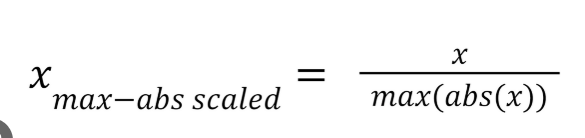


### This is the normalization formula


# Now Beginning with the data visualization part


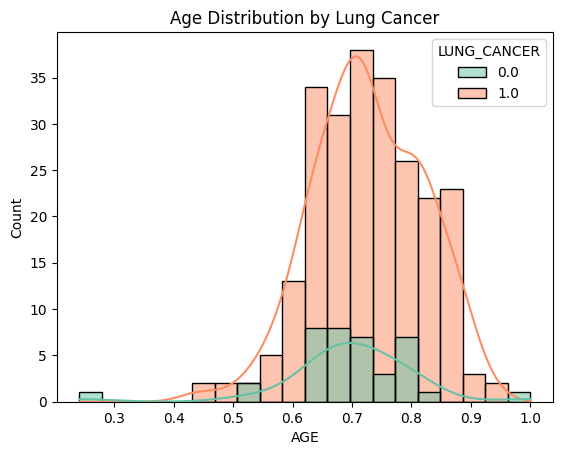

In [275]:
# Age distribution
sns.histplot(data=df, x='AGE', bins=20, kde=True, hue='LUNG_CANCER', palette='Set2')
plt.title('Age Distribution by Lung Cancer')
plt.show()

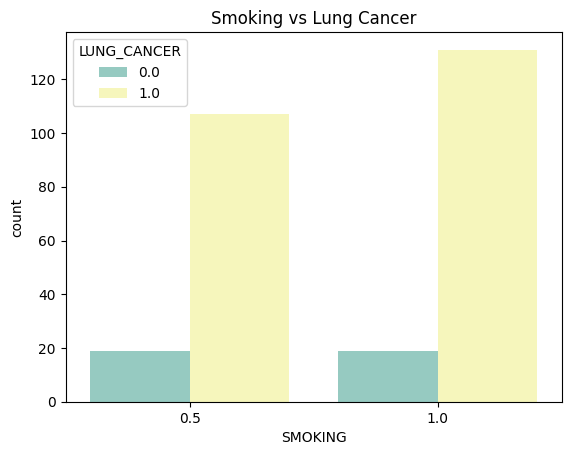

In [276]:
# Countplot of smoking vs lung cancer
sns.countplot(data=df, x='SMOKING', hue='LUNG_CANCER', palette='Set3')
plt.title('Smoking vs Lung Cancer')
plt.show()

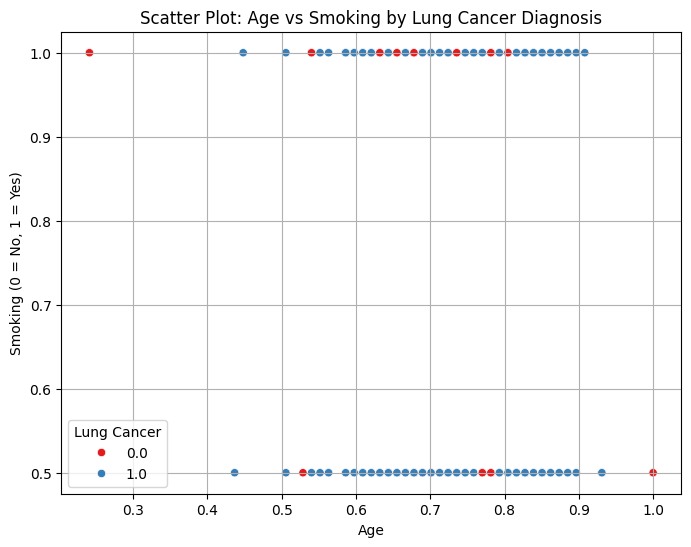

In [277]:
# Scatter plot of AGE vs SMOKING colored by LUNG_CANCER
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='AGE', y='SMOKING', hue='LUNG_CANCER', palette='Set1')
plt.title('Scatter Plot: Age vs Smoking by Lung Cancer Diagnosis')
plt.xlabel('Age')
plt.ylabel('Smoking (0 = No, 1 = Yes)')
plt.legend(title='Lung Cancer')
plt.grid(True)
plt.show()

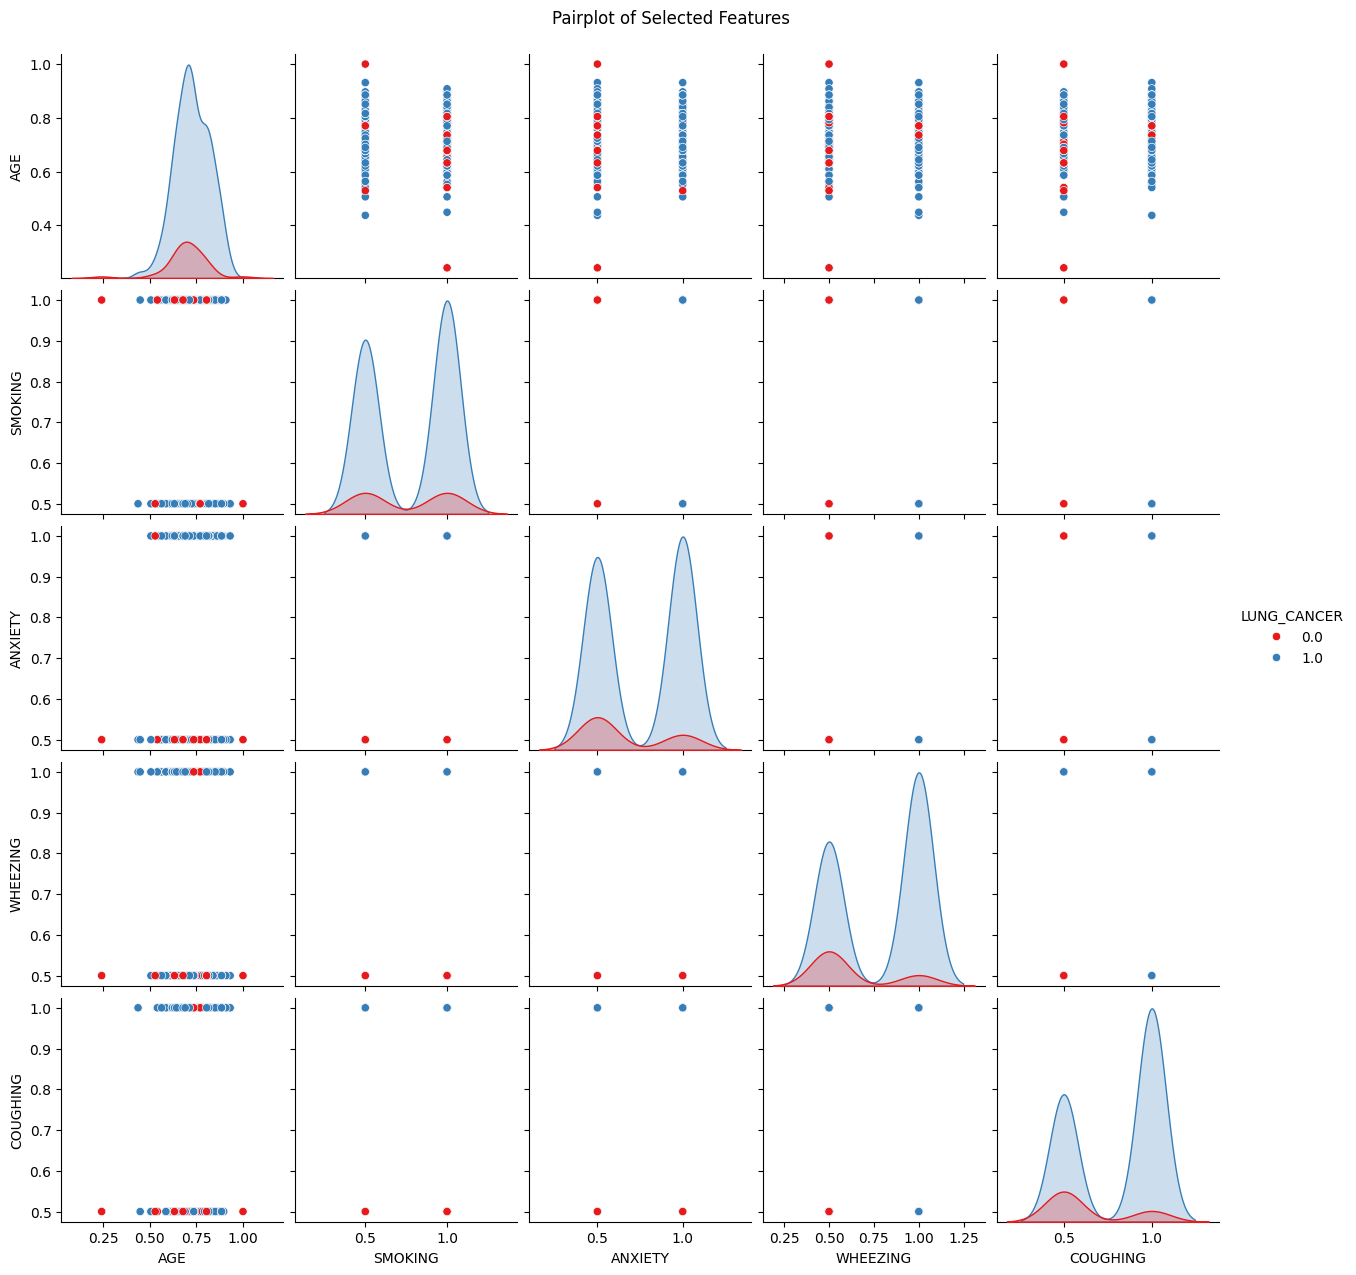

In [278]:
# Fix for pairplot: select only numeric data and drop NaNs
selected_features = ['AGE', 'SMOKING', 'ANXIETY', 'WHEEZING', 'COUGHING', 'LUNG_CANCER']
df[selected_features] = df[selected_features].apply(pd.to_numeric, errors='coerce')
df_clean = df[selected_features].dropna()

# Pairplot
sns.pairplot(df_clean, hue='LUNG_CANCER', palette='Set1')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

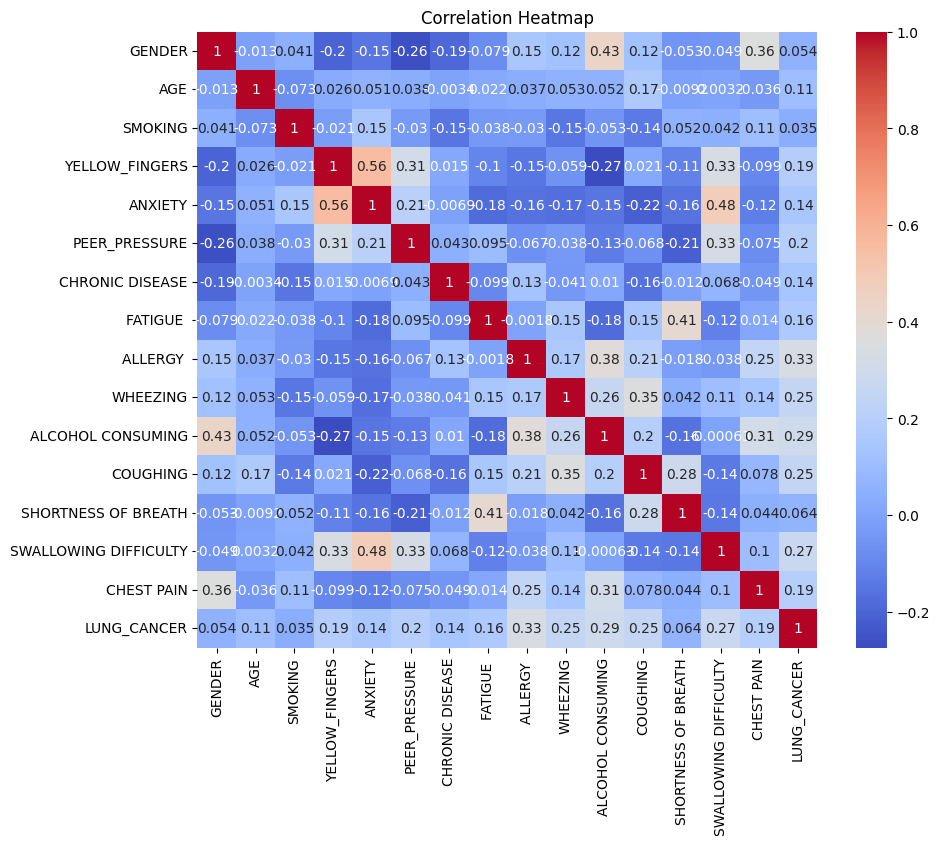

In [279]:
## Generating correlation matrix using heatmap to understant the dependency level for each column
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Now we can prepare the model using the pre processed dataset by creating test and train data using sklearn and find the accuracy


In [280]:
# seperating the output data from main dataset and create input and output
x=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']

print("this is the input data")
print(x)
print("this is the output data")
print(y)

this is the input data
     GENDER       AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1.0  0.793103      0.5             1.0      1.0            0.5   
1       1.0  0.850575      1.0             0.5      0.5            0.5   
2       0.0  0.678161      0.5             0.5      0.5            1.0   
3       1.0  0.724138      1.0             1.0      1.0            0.5   
4       0.0  0.724138      0.5             1.0      0.5            0.5   
..      ...       ...      ...             ...      ...            ...   
279     0.0  0.678161      0.5             1.0      1.0            1.0   
280     0.0  0.678161      1.0             0.5      0.5            0.5   
281     1.0  0.632184      1.0             0.5      0.5            0.5   
282     1.0  0.528736      0.5             1.0      1.0            0.5   
283     1.0  0.689655      0.5             1.0      1.0            0.5   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0              

In [281]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE(random_state=42).fit_resample(x, y)


In [282]:
#creating model using the sklearn and create train and test data using train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#total data in both X_train and X_test are show using .shape
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (380, 15)
Test shape: (96, 15)


#Now as we have Train and Test data we can use different algorithums like KNeighborsClassifier, LogisticRegression, RandomForestClassifier, SupportVectorMachine, NaveBays


## Lets Begin with KNN i.e K nearest neighbour algorithums


In [283]:
from sklearn.neighbors import KNeighborsClassifier
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [284]:
# finding the accuracy of KNN using the recall, precision and f1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# Metrics
print("=== KNeighborsClassifier ===")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== KNeighborsClassifier ===
Accuracy:  0.9479
Precision: 1.0000
Recall:    0.8864
F1 Score:  0.9398

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        52
         1.0       1.00      0.89      0.94        44

    accuracy                           0.95        96
   macro avg       0.96      0.94      0.95        96
weighted avg       0.95      0.95      0.95        96



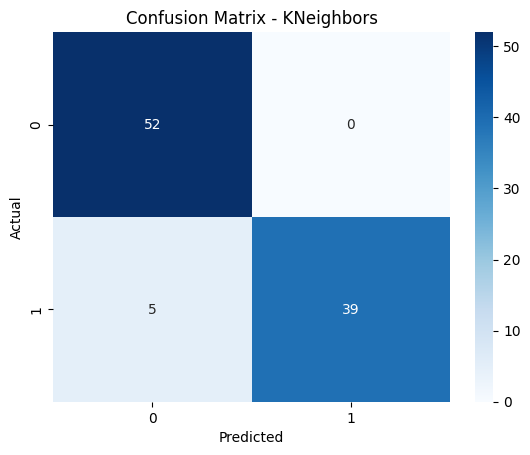

In [285]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.title("Confusion Matrix - KNeighbors")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Lets Begin with LogisticRegression

In [286]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [287]:
# Metrics
print("=== LogisticRegression ===")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== LogisticRegression ===
Accuracy:  0.9375
Precision: 0.9524
Recall:    0.9091
F1 Score:  0.9302

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.94        52
         1.0       0.95      0.91      0.93        44

    accuracy                           0.94        96
   macro avg       0.94      0.94      0.94        96
weighted avg       0.94      0.94      0.94        96



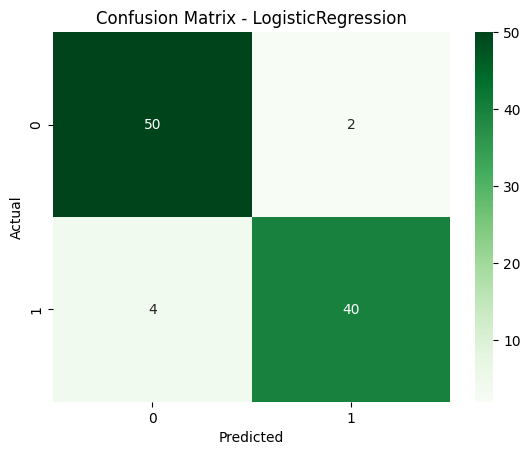

In [288]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Greens')
plt.title("Confusion Matrix - LogisticRegression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Lets Begin with RandomForest algorithum

In [289]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [290]:
# Metrics
print("=== RandomForestClassifier ===")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== RandomForestClassifier ===
Accuracy:  0.9688
Precision: 0.9767
Recall:    0.9545
F1 Score:  0.9655

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        52
         1.0       0.98      0.95      0.97        44

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96



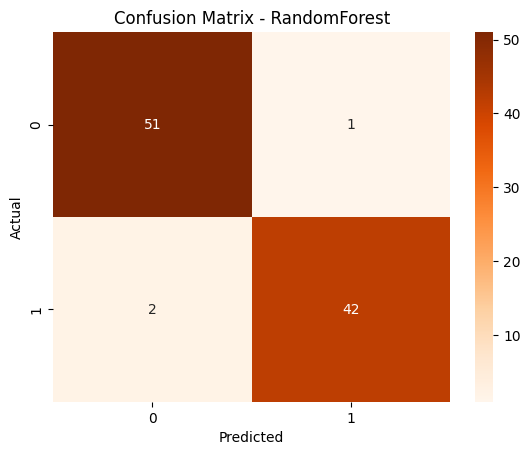

In [291]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Oranges')
plt.title("Confusion Matrix - RandomForest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Lets Begin with SVM i.e Support Vecotor Machine


In [292]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [293]:
print("=== Support Vector Machine ===")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== Support Vector Machine ===
Accuracy:  0.9792
Precision: 1.0000
Recall:    0.9545
F1 Score:  0.9767

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        52
         1.0       1.00      0.95      0.98        44

    accuracy                           0.98        96
   macro avg       0.98      0.98      0.98        96
weighted avg       0.98      0.98      0.98        96



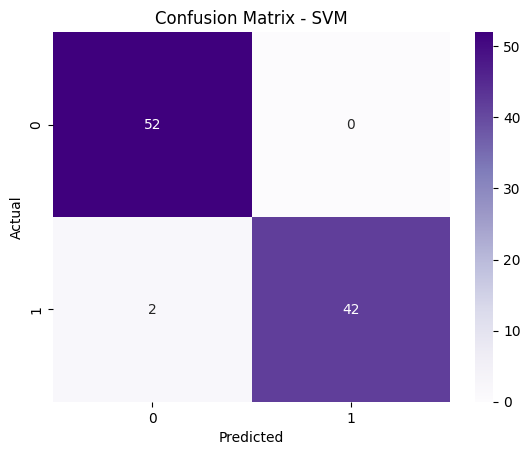

In [294]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Purples')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Lets Begin with NaveBays


In [295]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [296]:
print("=== Naive Bayes ===")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== Naive Bayes ===
Accuracy:  0.9375
Precision: 0.9524
Recall:    0.9091
F1 Score:  0.9302

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.94        52
         1.0       0.95      0.91      0.93        44

    accuracy                           0.94        96
   macro avg       0.94      0.94      0.94        96
weighted avg       0.94      0.94      0.94        96



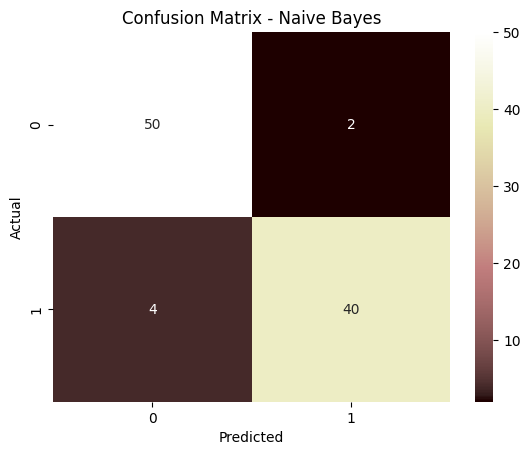

In [297]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='pink')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#After evaluating all models based on accuracy, precision, recall, F1-score, and visualizing confusion matrices, we found:

🔹 The Support Vector Machine (SVM) classifier achieved the highest accuracy of 98%, outperforming all other models.

🔹 It also maintained a balanced precision and recall, indicating its robustness in identifying both lung cancer and non-cancer cases accurately.

🔹 Feature correlation heatmaps and pairplots showed that smoking, anxiety, wheezing, and age were strongly associated with lung cancer, helping explain the predictive power of the model.

✅ Based on the results, SVM is the most suitable algorithm for this specific lung cancer dataset — delivering both high accuracy and generalizability.